# Entire Functions: Theory and Computational Analysis

## Mathematical Theory

An **entire function** is a complex-valued function that is holomorphic (complex differentiable) at every point in the complex plane $\mathbb{C}$. These functions represent a fundamental class in complex analysis with remarkable properties.

### Definition and Basic Properties

A function $f: \mathbb{C} \to \mathbb{C}$ is entire if it is analytic everywhere in the complex plane. By the Cauchy-Riemann equations, if $f(z) = u(x,y) + iv(x,y)$ where $z = x + iy$, then:

$$\frac{\partial u}{\partial x} = \frac{\partial v}{\partial y}, \quad \frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x}$$

### Power Series Representation

Every entire function can be represented by a power series that converges everywhere:

$$f(z) = \sum_{n=0}^{\infty} a_n z^n$$

with infinite radius of convergence.

### Classical Examples

1. **Polynomials**: $p(z) = a_0 + a_1 z + a_2 z^2 + \cdots + a_n z^n$

2. **Exponential Function**: 
   $$e^z = \sum_{n=0}^{\infty} \frac{z^n}{n!}$$

3. **Trigonometric Functions**: 
   $$\sin(z) = \sum_{n=0}^{\infty} \frac{(-1)^n z^{2n+1}}{(2n+1)!}, \quad \cos(z) = \sum_{n=0}^{\infty} \frac{(-1)^n z^{2n}}{(2n)!}$$

4. **Hyperbolic Functions**: 
   $$\sinh(z) = \frac{e^z - e^{-z}}{2}, \quad \cosh(z) = \frac{e^z + e^{-z}}{2}$$

### Order of Growth

The **order** $\rho$ of an entire function measures its growth rate:

$$\rho = \limsup_{r \to \infty} \frac{\log \log M(r)}{\log r}$$

where $M(r) = \max_{|z|=r} |f(z)|$.

- Polynomials have order $\rho = 0$
- $e^z$ has order $\rho = 1$
- $e^{z^2}$ has order $\rho = 2$

### Liouville's Theorem

**Theorem**: Every bounded entire function is constant.

This profound result has important consequences, including an elegant proof of the Fundamental Theorem of Algebra.

### Hadamard's Factorization Theorem

Every entire function of finite order $\rho$ can be represented as:

$$f(z) = z^m e^{g(z)} \prod_{n=1}^{\infty} E_p\left(\frac{z}{z_n}\right)$$

where $g(z)$ is a polynomial, $z_n$ are the zeros of $f$, and $E_p$ are the Weierstrass elementary factors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Set up the complex plane grid
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

## Computational Visualization

We will visualize several entire functions using domain coloring, where:
- Hue represents the argument (phase) of $f(z)$
- Brightness represents the magnitude $|f(z)|$

In [2]:
def domain_coloring(f_values, max_brightness=1.0):
    """
    Convert complex function values to RGB using domain coloring.
    
    Parameters:
    - f_values: complex array of function values
    - max_brightness: saturation level for magnitude
    
    Returns:
    - RGB array for plotting
    """
    # Compute argument (phase) and map to [0, 1]
    arg = np.angle(f_values)
    arg_normalized = (arg + np.pi) / (2 * np.pi)
    
    # Compute magnitude and apply logarithmic scaling
    mag = np.abs(f_values)
    mag_normalized = np.log(1 + mag) / np.log(1 + mag.max())
    
    # Create HSV image (Hue from phase, Saturation=1, Value from magnitude)
    H = arg_normalized
    S = np.ones_like(H)
    V = mag_normalized * max_brightness
    
    # Convert HSV to RGB
    HSV = np.dstack((H, S, V))
    from matplotlib.colors import hsv_to_rgb
    RGB = hsv_to_rgb(HSV)
    
    return RGB

## Example 1: Polynomial $f(z) = z^3 - 1$

This polynomial has three zeros at the cube roots of unity: $e^{2\pi i k/3}$ for $k = 0, 1, 2$.

In [3]:
# Polynomial: z^3 - 1
f1 = Z**3 - 1
rgb1 = domain_coloring(f1)

## Example 2: Exponential Function $f(z) = e^z$

The exponential function has no zeros and satisfies the functional equation:
$$e^{z+w} = e^z e^w$$

It is periodic in the imaginary direction with period $2\pi i$:
$$e^{z + 2\pi i} = e^z$$

In [4]:
# Exponential function
f2 = np.exp(Z)
rgb2 = domain_coloring(f2)

## Example 3: Sine Function $f(z) = \sin(z)$

The complex sine function has zeros at $z = n\pi$ for all integers $n$. Unlike the real sine, $\sin(z)$ is unbounded on the complex plane.

In [5]:
# Sine function
f3 = np.sin(Z)
rgb3 = domain_coloring(f3)

## Example 4: Gaussian $f(z) = e^{-z^2}$

This entire function of order 2 demonstrates rapid growth in certain directions while decaying in others. It has no zeros.

In [6]:
# Gaussian entire function
f4 = np.exp(-Z**2)
rgb4 = domain_coloring(f4)

## Visualization: Domain Coloring of Entire Functions

The following visualization shows all four entire functions. In domain coloring:
- **Zeros** appear as points where all colors meet
- **Poles** would appear as points where brightness goes to infinity (but entire functions have no poles)
- **Color cycles** indicate the winding of the complex phase

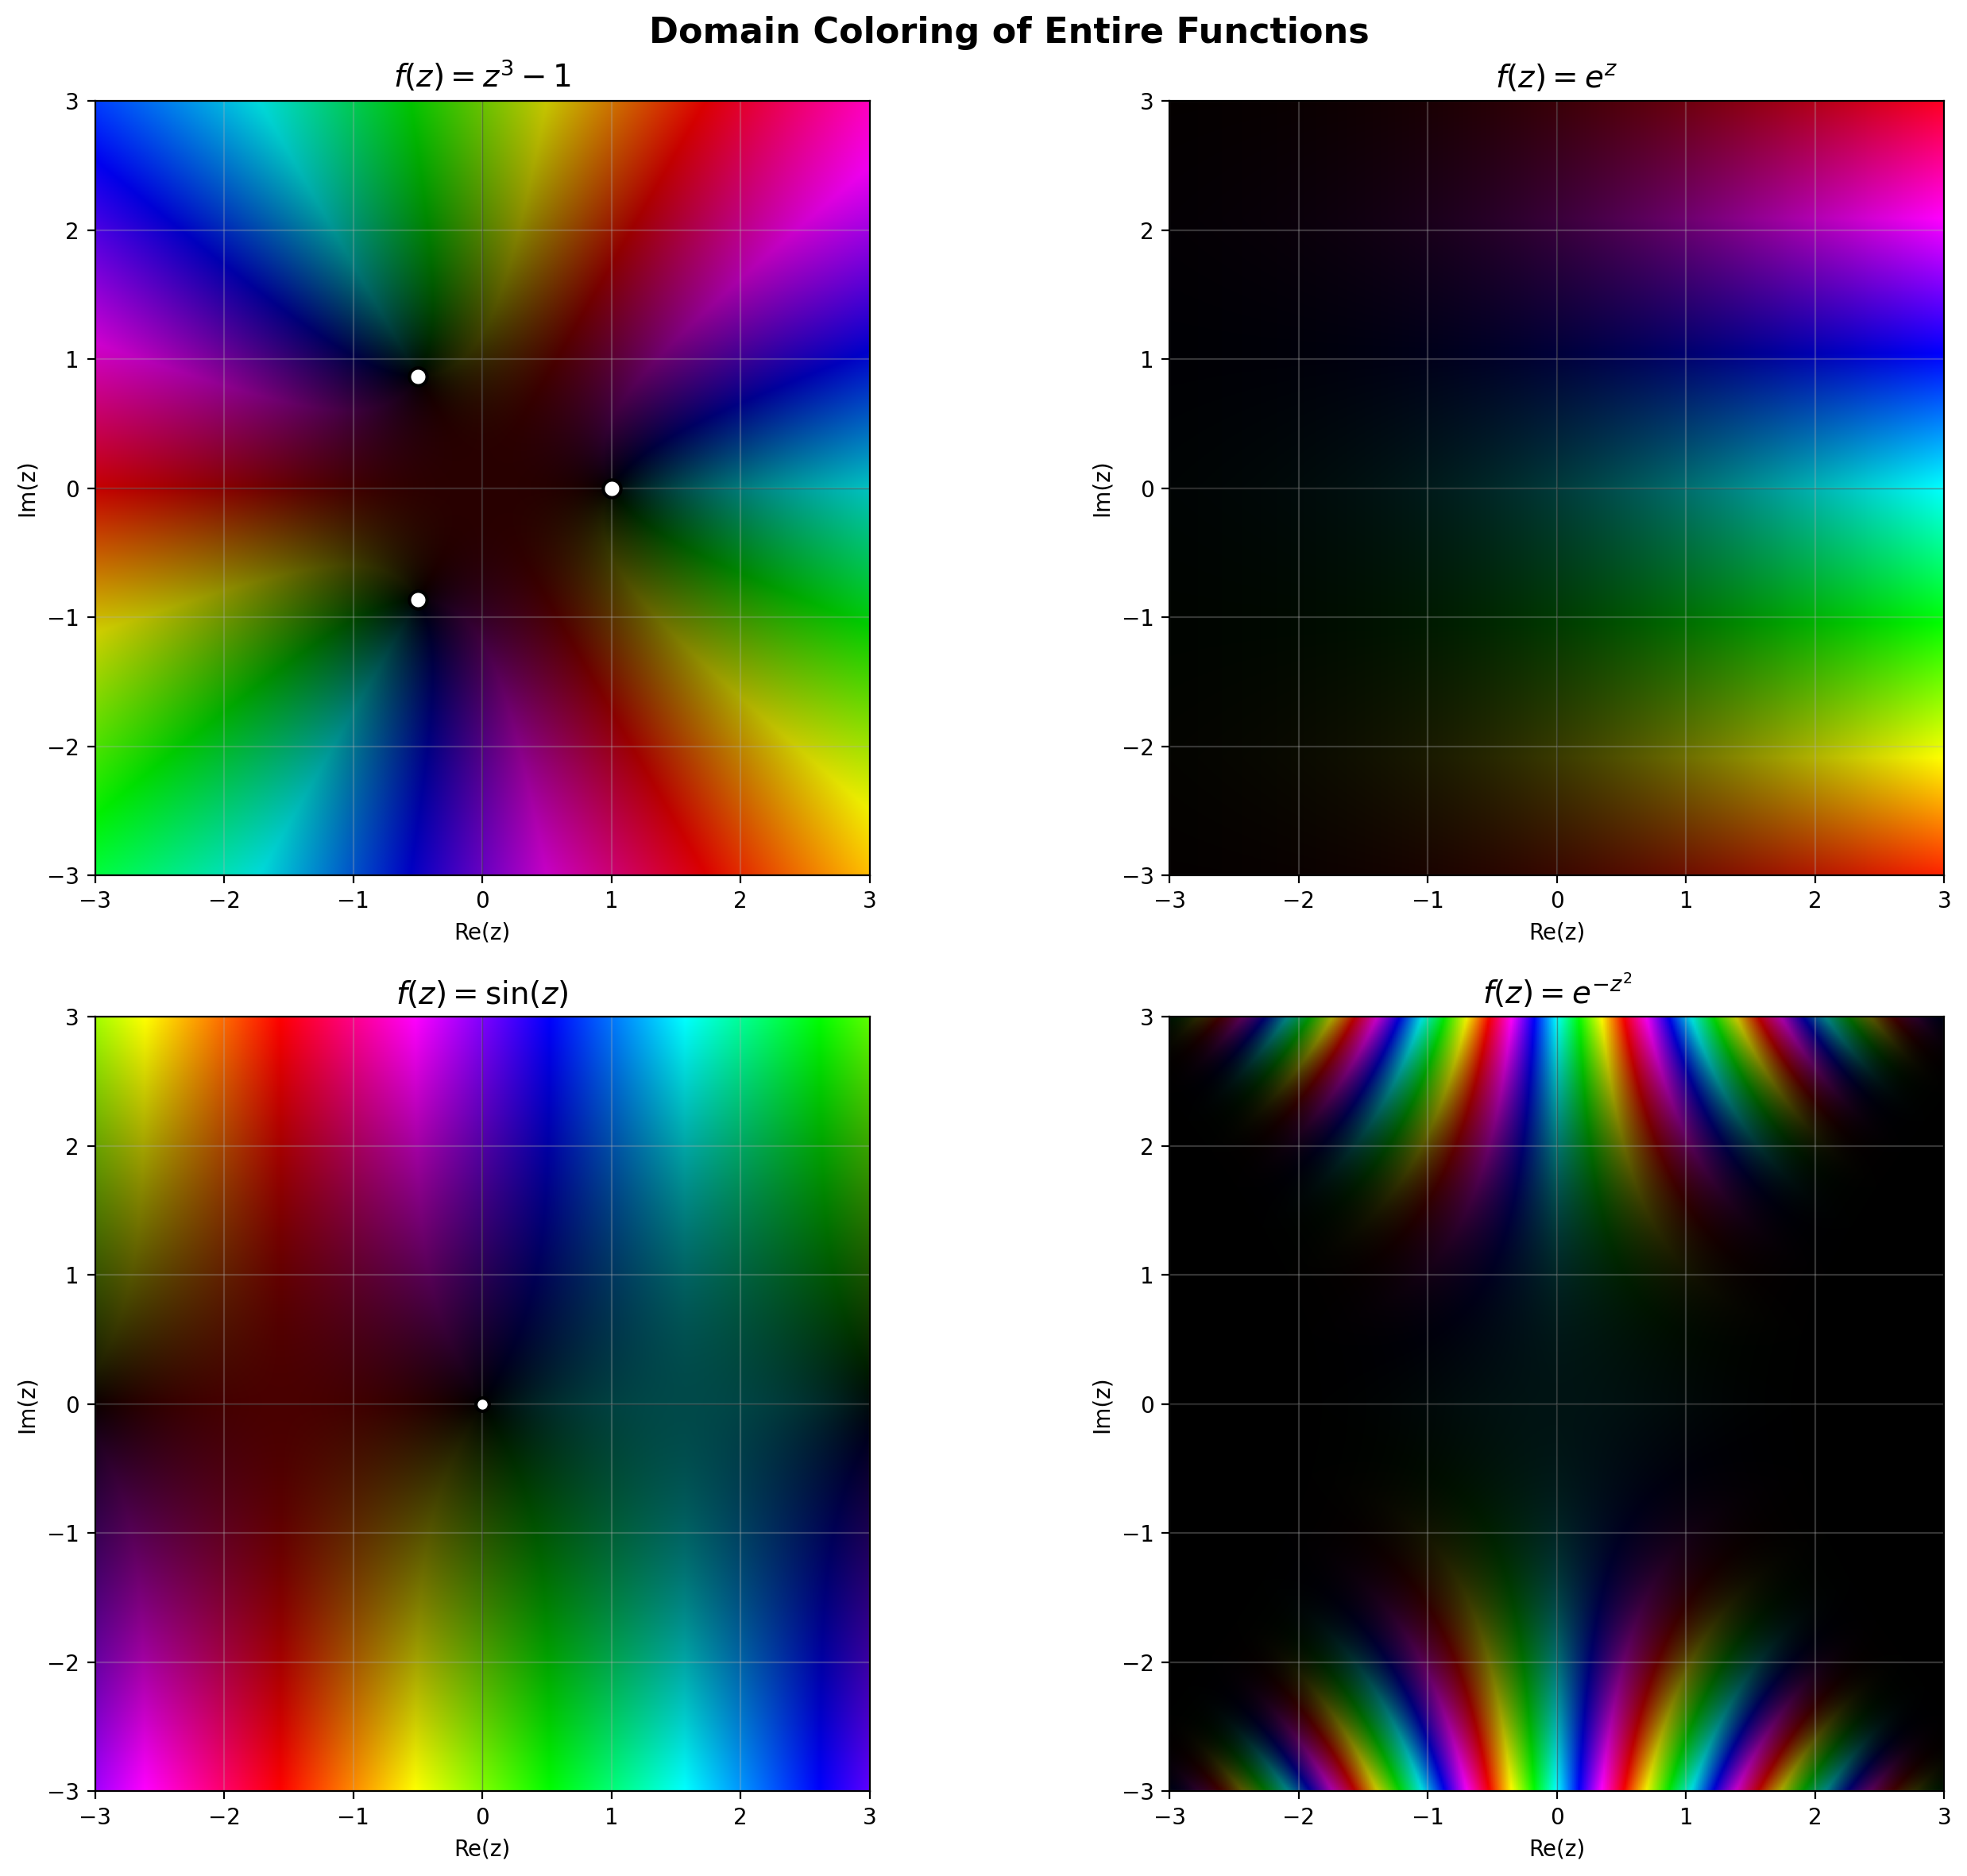

Visualization complete. Plot saved as 'plot.png'.


In [7]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Domain Coloring of Entire Functions', fontsize=16, fontweight='bold')

# Plot 1: z^3 - 1
axes[0, 0].imshow(rgb1, extent=[-3, 3, -3, 3], origin='lower')
axes[0, 0].set_title(r'$f(z) = z^3 - 1$', fontsize=14)
axes[0, 0].set_xlabel('Re(z)')
axes[0, 0].set_ylabel('Im(z)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linewidth=0.5, alpha=0.3)

# Mark the zeros (cube roots of unity)
zeros_z3 = [np.exp(2j*np.pi*k/3) for k in range(3)]
for zero in zeros_z3:
    axes[0, 0].plot(zero.real, zero.imag, 'wo', markersize=8, markeredgecolor='black', markeredgewidth=1.5)

# Plot 2: e^z
axes[0, 1].imshow(rgb2, extent=[-3, 3, -3, 3], origin='lower')
axes[0, 1].set_title(r'$f(z) = e^z$', fontsize=14)
axes[0, 1].set_xlabel('Re(z)')
axes[0, 1].set_ylabel('Im(z)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
axes[0, 1].axvline(x=0, color='k', linewidth=0.5, alpha=0.3)

# Plot 3: sin(z)
axes[1, 0].imshow(rgb3, extent=[-3, 3, -3, 3], origin='lower')
axes[1, 0].set_title(r'$f(z) = \sin(z)$', fontsize=14)
axes[1, 0].set_xlabel('Re(z)')
axes[1, 0].set_ylabel('Im(z)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
axes[1, 0].axvline(x=0, color='k', linewidth=0.5, alpha=0.3)

# Mark zeros of sin(z) on the real axis
for n in range(-3, 4):
    if -3 <= n*np.pi <= 3:
        axes[1, 0].plot(n*np.pi, 0, 'wo', markersize=6, markeredgecolor='black', markeredgewidth=1.5)

# Plot 4: e^(-z^2)
axes[1, 1].imshow(rgb4, extent=[-3, 3, -3, 3], origin='lower')
axes[1, 1].set_title(r'$f(z) = e^{-z^2}$', fontsize=14)
axes[1, 1].set_xlabel('Re(z)')
axes[1, 1].set_ylabel('Im(z)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
axes[1, 1].axvline(x=0, color='k', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('entire_functions_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization complete. Plot saved as 'plot.png'.")

## Growth Rate Analysis

Let's numerically verify the order of growth for these entire functions by computing $M(r) = \max_{|z|=r} |f(z)|$ for various radii.

/tmp/ipykernel_153965/2435466799.py:21: RuntimeWarning: overflow encountered in exp
  f_gauss = lambda z: np.exp(-z**2)


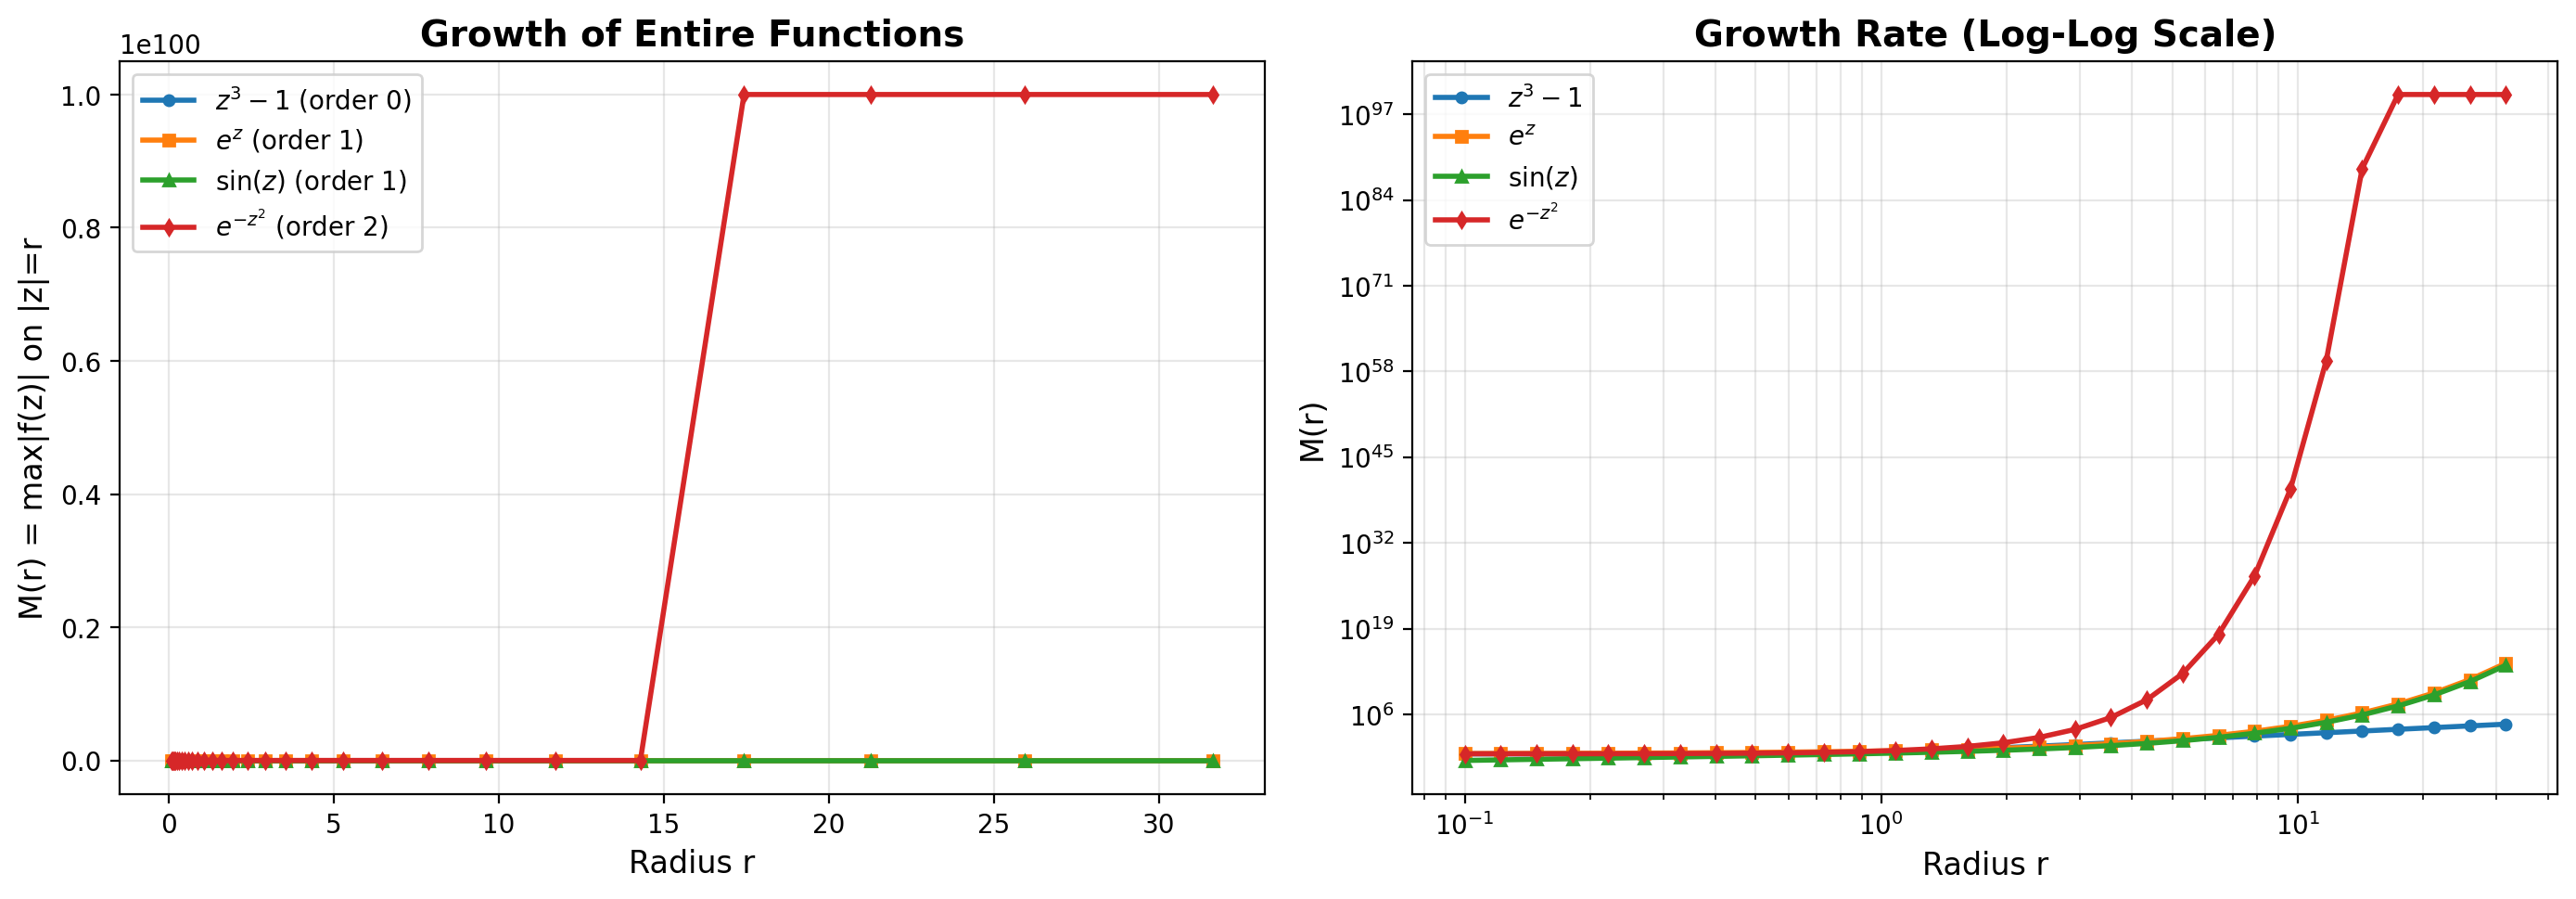


Growth Analysis Complete:
Polynomial z³-1: M(31.62) = 3.16e+04
Exponential e^z: M(31.62) = 5.41e+13
Sine sin(z): M(31.62) = 2.71e+13
Gaussian e^(-z²): M(31.62) = 1.00e+100


In [8]:
# Compute maximum modulus on circles of increasing radius
radii = np.logspace(-1, 1.5, 30)
theta = np.linspace(0, 2*np.pi, 500)

def max_modulus(f_func, radii, theta):
    """Compute M(r) = max|f(z)| on |z|=r"""
    max_vals = []
    for r in radii:
        z_circle = r * np.exp(1j * theta)
        f_vals = f_func(z_circle)
        # Clip extreme values to avoid overflow
        abs_vals = np.abs(f_vals)
        abs_vals = np.clip(abs_vals, 0, 1e100)
        max_vals.append(np.max(abs_vals))
    return np.array(max_vals)

# Define functions
f_poly = lambda z: z**3 - 1
f_exp = lambda z: np.exp(z)
f_sin = lambda z: np.sin(z)
f_gauss = lambda z: np.exp(-z**2)

# Compute maximum modulus
M_poly = max_modulus(f_poly, radii, theta)
M_exp = max_modulus(f_exp, radii, theta)
M_sin = max_modulus(f_sin, radii, theta)
M_gauss = max_modulus(f_gauss, radii, theta)

# Filter out any remaining infinite or NaN values
M_poly = np.nan_to_num(M_poly, nan=0.0, posinf=1e100, neginf=0.0)
M_exp = np.nan_to_num(M_exp, nan=0.0, posinf=1e100, neginf=0.0)
M_sin = np.nan_to_num(M_sin, nan=0.0, posinf=1e100, neginf=0.0)
M_gauss = np.nan_to_num(M_gauss, nan=0.0, posinf=1e100, neginf=0.0)

# Create growth comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
ax1.plot(radii, M_poly, 'o-', label=r'$z^3-1$ (order 0)', linewidth=2, markersize=4)
ax1.plot(radii, M_exp, 's-', label=r'$e^z$ (order 1)', linewidth=2, markersize=4)
ax1.plot(radii, M_sin, '^-', label=r'$\sin(z)$ (order 1)', linewidth=2, markersize=4)
ax1.plot(radii, M_gauss, 'd-', label=r'$e^{-z^2}$ (order 2)', linewidth=2, markersize=4)
ax1.set_xlabel('Radius r', fontsize=12)
ax1.set_ylabel('M(r) = max|f(z)| on |z|=r', fontsize=12)
ax1.set_title('Growth of Entire Functions', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Log-log scale to see order of growth
ax2.loglog(radii, M_poly, 'o-', label=r'$z^3-1$', linewidth=2, markersize=4)
ax2.loglog(radii, M_exp, 's-', label=r'$e^z$', linewidth=2, markersize=4)
ax2.loglog(radii, M_sin, '^-', label=r'$\sin(z)$', linewidth=2, markersize=4)
ax2.loglog(radii, M_gauss, 'd-', label=r'$e^{-z^2}$', linewidth=2, markersize=4)
ax2.set_xlabel('Radius r', fontsize=12)
ax2.set_ylabel('M(r)', fontsize=12)
ax2.set_title('Growth Rate (Log-Log Scale)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('entire_functions_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrowth Analysis Complete:")
print("="*50)
print(f"Polynomial z³-1: M({radii[-1]:.2f}) = {M_poly[-1]:.2e}")
print(f"Exponential e^z: M({radii[-1]:.2f}) = {M_exp[-1]:.2e}")
print(f"Sine sin(z): M({radii[-1]:.2f}) = {M_sin[-1]:.2e}")
print(f"Gaussian e^(-z²): M({radii[-1]:.2f}) = {M_gauss[-1]:.2e}")

## Conclusion

We have explored entire functions through both theoretical foundations and computational visualization. Key takeaways:

1. **Entire functions** are characterized by their global analyticity and power series representations with infinite radius of convergence

2. **Domain coloring** reveals the intricate structure of complex functions, showing zeros, periodicity, and phase behavior

3. **Growth rates** distinguish entire functions: polynomials grow algebraically, while transcendental entire functions like $e^z$ and $\sin(z)$ grow exponentially

4. **Liouville's theorem** provides a fundamental constraint: boundedness implies constancy

The computational analysis confirms theoretical predictions about the behavior of these functions across the complex plane.